In [1]:
import os
import numpy as np
import glob
import pandas as pd
import tensorflow as tf

from matplotlib import pyplot as plt
#print(tf.__version__) # 2.4.1
# DATA_DIR = os.path.join(os.path.dirname("/home/jiyoung/modelnet/"), "ModelNet40")
# print(DATA_DIR)

# mesh = trimesh.load(os.path.join(DATA_DIR, "person/train/person_0013.off"))

# mesh.show()

x: [0.28316445 0.4272206  0.24439842 0.24649116 0.23778601 0.45726422
 0.14006529 0.35215274 0.30003804 0.28536642 0.45800881 0.07837592
 0.35135403 0.33095769 0.44691441 0.15161123 0.31835456 0.2544694
 0.35096587 0.2621946  0.303681   0.41811201 0.24855562 0.35623884
 0.36804351 0.35377883 0.30315398 0.11847339 0.32093103 0.27590953
 0.27583641 0.23913614 0.43101421 0.30553792 0.45322914 0.21722107
 0.38889234 0.34796085 0.34605156 0.33458362 0.5039243  0.24458189
 0.46660282 0.34541012 0.30135339 0.23626869 0.47282176 0.37375134
 0.30891981 0.39114096 0.29485683 0.31779668 0.23064287 0.27075777
 0.25178042 0.25865172 0.09482544 0.42901012 0.26476352 0.41421249
 0.13307896 0.48829373 0.4526294  0.42581242 0.24744747 0.50724441
 0.22440764 0.40695076 0.26174224 0.32210294 0.42962577 0.13090341
 0.32931292 0.56644069 0.28717868 0.28833096 0.2491997  0.20071294
 0.54915605 0.17495203 0.38483858 0.53603392 0.30683735 0.11357081
 0.43854771 0.1198619  0.26058436 0.32546073 0.21219534 0.31

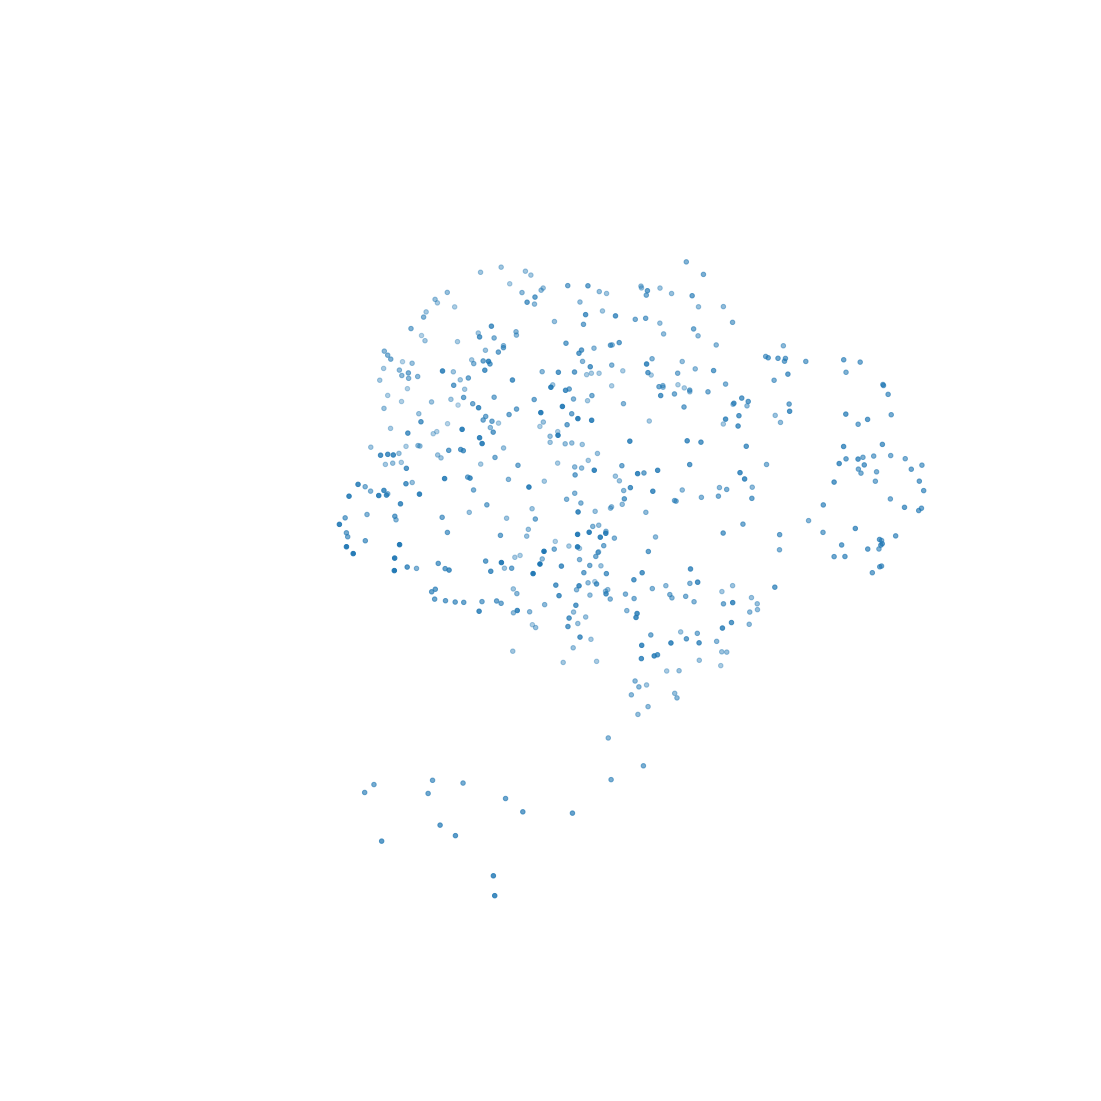

In [26]:
points = mesh.sample(512)

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(points[:, 0], points[:, 1], points[:, 2])
ax.set_axis_off()

print('x:' ,points[:,0])

print('x length: ',len(points[:,0]))
print('y length: ',len(points[:,1]))



In [32]:
def parse_dataset(num_points=512):

    train_points = []
    train_labels = []
    test_points = []
    test_labels = []
    class_map = {}
    folders = glob.glob(os.path.join("/home/jiyoung/modelnet/ModelNet40", "car"))
    print(folders)

    for i, folder in enumerate(folders):
        print("processing class: {}".format(os.path.basename(folder)))
        # store folder name with ID so we can retrieve later
        class_map[i] = folder.split("/")[-1]
        # gather all files
        train_files = glob.glob(os.path.join(folder, "train/*"))
        test_files = glob.glob(os.path.join(folder, "test/*"))
        print(i)

        for f in train_files:
            train_points.append(trimesh.load(f).sample(num_points))
            train_labels.append(i)
            print(f)

        for f in test_files:
            test_points.append(trimesh.load(f).sample(num_points))
            test_labels.append(i)
            print(f)

    return (
        np.array(train_points),
        np.array(test_points),
        np.array(train_labels),
        np.array(test_labels),
        class_map,
    )

In [33]:
NUM_POINTS = 512
NUM_CLASSES = 4
BATCH_SIZE = 32

train_points, test_points, train_labels, test_labels, CLASS_MAP = parse_dataset(
    NUM_POINTS
)

print(train_points)

print('finish')


['/home/jiyoung/modelnet/ModelNet40/car']
processing class: car
0
/home/jiyoung/modelnet/ModelNet40/car/train/car_0118.off
/home/jiyoung/modelnet/ModelNet40/car/train/car_0020.off
/home/jiyoung/modelnet/ModelNet40/car/train/car_0147.off
/home/jiyoung/modelnet/ModelNet40/car/train/car_0185.off
/home/jiyoung/modelnet/ModelNet40/car/train/car_0192.off
/home/jiyoung/modelnet/ModelNet40/car/train/car_0018.off
/home/jiyoung/modelnet/ModelNet40/car/train/car_0131.off
/home/jiyoung/modelnet/ModelNet40/car/train/car_0066.off
/home/jiyoung/modelnet/ModelNet40/car/train/car_0067.off
/home/jiyoung/modelnet/ModelNet40/car/train/car_0071.off
/home/jiyoung/modelnet/ModelNet40/car/train/car_0060.off
/home/jiyoung/modelnet/ModelNet40/car/train/car_0006.off
/home/jiyoung/modelnet/ModelNet40/car/train/car_0189.off
/home/jiyoung/modelnet/ModelNet40/car/train/car_0123.off
/home/jiyoung/modelnet/ModelNet40/car/train/car_0050.off
/home/jiyoung/modelnet/ModelNet40/car/train/car_0119.off
/home/jiyoung/modelnet

/home/jiyoung/modelnet/ModelNet40/car/train/car_0051.off
/home/jiyoung/modelnet/ModelNet40/car/train/car_0141.off
/home/jiyoung/modelnet/ModelNet40/car/train/car_0194.off
/home/jiyoung/modelnet/ModelNet40/car/train/car_0070.off
/home/jiyoung/modelnet/ModelNet40/car/train/car_0186.off
/home/jiyoung/modelnet/ModelNet40/car/train/car_0056.off
/home/jiyoung/modelnet/ModelNet40/car/train/car_0143.off
/home/jiyoung/modelnet/ModelNet40/car/train/car_0182.off
/home/jiyoung/modelnet/ModelNet40/car/train/car_0089.off
/home/jiyoung/modelnet/ModelNet40/car/train/car_0102.off
/home/jiyoung/modelnet/ModelNet40/car/train/car_0124.off
/home/jiyoung/modelnet/ModelNet40/car/train/car_0132.off
/home/jiyoung/modelnet/ModelNet40/car/train/car_0049.off
/home/jiyoung/modelnet/ModelNet40/car/train/car_0009.off
/home/jiyoung/modelnet/ModelNet40/car/train/car_0001.off
/home/jiyoung/modelnet/ModelNet40/car/train/car_0175.off
/home/jiyoung/modelnet/ModelNet40/car/train/car_0074.off
/home/jiyoung/modelnet/ModelNet

/home/jiyoung/modelnet/ModelNet40/car/test/car_0278.off
/home/jiyoung/modelnet/ModelNet40/car/test/car_0250.off
/home/jiyoung/modelnet/ModelNet40/car/test/car_0198.off
/home/jiyoung/modelnet/ModelNet40/car/test/car_0216.off
/home/jiyoung/modelnet/ModelNet40/car/test/car_0244.off
/home/jiyoung/modelnet/ModelNet40/car/test/car_0210.off
/home/jiyoung/modelnet/ModelNet40/car/test/car_0228.off
[[[ 4.45829863e+04  3.70242164e+04  2.23749147e+04]
  [ 1.65251882e+04  2.54363665e+04  2.20269107e+04]
  [ 8.82584512e+03  8.55759125e+04  2.36457819e+04]
  ...
  [ 5.28410561e+03  1.07413106e+05  1.79531148e+04]
  [ 3.15822447e+04  2.36640349e+04  8.41077382e+03]
  [ 2.12440499e+04  1.10866899e+05  1.26938598e+04]]

 [[ 9.74690743e+01  7.10777988e+01  2.05604464e+01]
  [ 1.86252390e+01  7.85512212e+01  6.24903063e+01]
  [ 9.79406148e+01  2.31116046e+02  6.83011958e+01]
  ...
  [ 3.25500089e+02  2.36383000e+02  4.68714258e+00]
  [ 2.69048265e+02  9.43914345e+01  1.23519969e+02]
  [ 1.70488491e+02  2.

In [28]:
def augment(points, label):
    # jitter points
    points += tf.random.uniform(points.shape, -0.005, 0.005, dtype=tf.float64)
    # shuffle points
    points = tf.random.shuffle(points)
    return points, label


# print(train_points)
# print(train_labels)
train_dataset = tf.data.Dataset.from_tensor_slices((train_points, train_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_points, test_labels))

train_dataset = train_dataset.shuffle(len(train_points)).map(augment).batch(BATCH_SIZE)
test_dataset = test_dataset.shuffle(len(test_points)).batch(BATCH_SIZE)
print(train_dataset)
print(test_dataset)
# print('--------------------')
# print(train_points[0] )
# print(len(train_points[0]))
# print(len(train_labels))


# train_dataset.to_csv('modelnet_train.csv')
# test_dataset = test_dataset.shuffle(len(test_points)).batch(BATCH_SIZE)

<BatchDataset shapes: ((None, 512, 3), (None,)), types: (tf.float64, tf.int64)>
<BatchDataset shapes: ((None, 512, 3), (None,)), types: (tf.float64, tf.int64)>


In [16]:
def conv_bn(x, filters):
    x = layers.Conv1D(filters, kernel_size=1, padding="valid")(x)
    x = layers.BatchNormalization(momentum=0.0)(x)
    return layers.Activation("relu")(x)


def dense_bn(x, filters):
    x = layers.Dense(filters)(x)
    x = layers.BatchNormalization(momentum=0.0)(x)
    return layers.Activation("relu")(x)


In [17]:
import keras

class OrthogonalRegularizer(keras.regularizers.Regularizer):
    def __init__(self, num_features, l2reg=0.001):
        self.num_features = num_features
        self.l2reg = l2reg
        self.eye = tf.eye(num_features)

    def __call__(self, x):
        x = tf.reshape(x, (-1, self.num_features, self.num_features))
        xxt = tf.tensordot(x, x, axes=(2, 2))
        xxt = tf.reshape(xxt, (-1, self.num_features, self.num_features))
        return tf.reduce_sum(self.l2reg * tf.square(xxt - self.eye))

In [18]:
def tnet(inputs, num_features):

    # Initalise bias as the indentity matrix
    bias = keras.initializers.Constant(np.eye(num_features).flatten())
    reg = OrthogonalRegularizer(num_features)

    x = conv_bn(inputs, 32)
    x = conv_bn(x, 64)
    x = conv_bn(x, 512)
    x = layers.GlobalMaxPooling1D()(x)
    x = dense_bn(x, 256)
    x = dense_bn(x, 128)
    x = layers.Dense(
        num_features * num_features,
        kernel_initializer="zeros",
        bias_initializer=bias,
        activity_regularizer=reg,
    )(x)
    feat_T = layers.Reshape((num_features, num_features))(x)
    # Apply affine transformation to input features
    return layers.Dot(axes=(2, 1))([inputs, feat_T])

In [19]:
from tensorflow.keras import layers

inputs = keras.Input(shape=(NUM_POINTS, 3))

x = tnet(inputs, 3)
x = conv_bn(x, 32)
x = conv_bn(x, 32)
x = tnet(x, 32)
x = conv_bn(x, 32)
x = conv_bn(x, 64)
x = conv_bn(x, 512)
x = layers.GlobalMaxPooling1D()(x)
x = dense_bn(x, 256)
x = layers.Dropout(0.3)(x)
x = dense_bn(x, 128)
x = layers.Dropout(0.3)(x)

outputs = layers.Dense(NUM_POINTS, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="pointnet")
model.summary()

Model: "pointnet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 3)]     0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 512, 32)      128         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 512, 32)      128         conv1d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 512, 32)      0           batch_normalization[0][0]        
___________________________________________________________________________________________

In [20]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["sparse_categorical_accuracy"],
)
print(test_dataset)

model.fit(train_dataset, epochs=40, validation_data=test_dataset)

<BatchDataset shapes: ((None, 512, 3), (None,)), types: (tf.float64, tf.int64)>
Epoch 1/40
15/15 [==============================] - 12s 502ms/step - loss: 8.1665 - sparse_categorical_accuracy: 0.0355 - val_loss: 109.1319 - val_sparse_categorical_accuracy: 0.2906
Epoch 2/40
15/15 [==============================] - 7s 472ms/step - loss: 6.6351 - sparse_categorical_accuracy: 0.3071 - val_loss: 191590088704.0000 - val_sparse_categorical_accuracy: 0.4500
Epoch 3/40
15/15 [==============================] - 7s 475ms/step - loss: 5.5406 - sparse_categorical_accuracy: 0.4004 - val_loss: 13616439885824.0000 - val_sparse_categorical_accuracy: 0.6094
Epoch 4/40
15/15 [==============================] - 7s 461ms/step - loss: 4.2117 - sparse_categorical_accuracy: 0.3779 - val_loss: 22892901302272.0000 - val_sparse_categorical_accuracy: 0.5813
Epoch 5/40
15/15 [==============================] - 7s 481ms/step - loss: 3.4422 - sparse_categorical_accuracy: 0.3744 - val_loss: 48642589196288.0000 - val_spa

size 32
tf.Tensor(
[[[  7.71426401   1.03002157   2.60075557]
  [ 17.63885896   8.44305717  29.48694571]
  [ 22.81297948   5.43173122  39.72217358]
  ...
  [  7.87917991   4.08826359   7.56737729]
  [ 25.59048395  14.83020412  13.4637145 ]
  [ 17.77342345  16.19737739  21.73433222]]

 [[-11.01899441  15.76837154  25.50767333]
  [ -0.22439582  -2.00588951  26.76135365]
  [ -2.26309895  14.23611315  29.26774338]
  ...
  [ -7.15847623   5.51889756  22.45258659]
  [ -1.5425056   20.21119881  47.37757849]
  [ -5.774152    15.56921987  24.55605609]]

 [[ -8.31350896   1.98518    -15.74786913]
  [  3.93740845   2.73518    -12.70468697]
  [  1.4311061   -0.31958831  -5.93842819]
  ...
  [  3.93023196   0.19993515  -6.01280482]
  [ -7.64329856   4.34973212  16.02151362]
  [  5.37496932  -9.39915    -12.78918429]]

 ...

 [[114.67677091   0.233719    48.5248505 ]
  [118.66604105   0.233719    52.58239568]
  [128.55160393   0.233719    57.85638682]
  ...
  [110.69872008   0.233719    23.97290829]

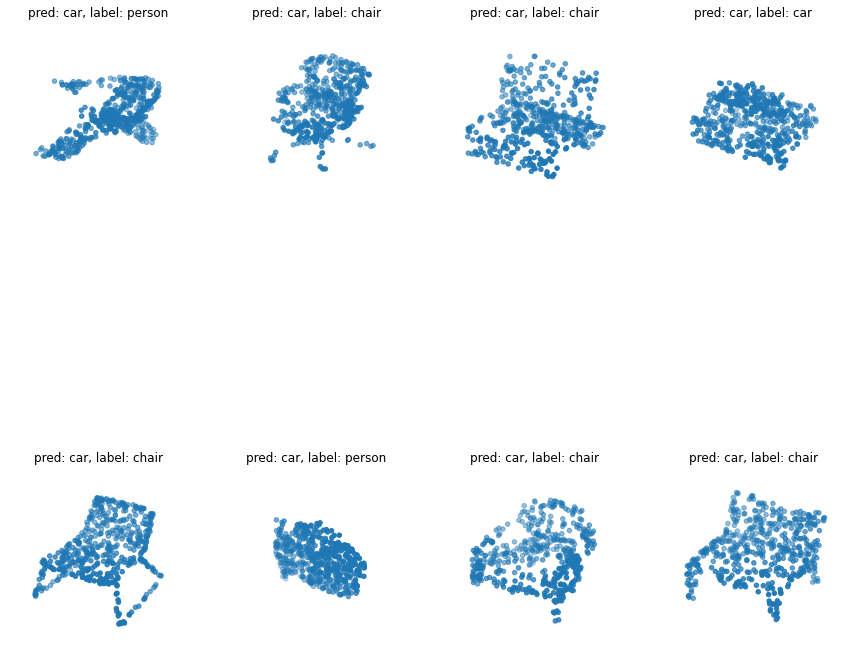

In [24]:
data = test_dataset.take(1)

# print(list(data)[0])
points,labels = list(data)[0]
# print(points)
# print('shape',points.shape)
# print('dim', points.ndim)
print('size', len(points))
points = points[:8, ...]
labels = labels[:8, ...]

print(points)
print(labels)

preds = model.predict(points)
print('preds: ', preds)
preds = tf.math.argmax(preds,-1)

for young in range(1):
    print(preds[young].numpy())
    
fig = plt.figure(figsize=(15, 15))
for i in range(8):
    ax = fig.add_subplot(2, 4, i + 1, projection="3d")
    ax.scatter(points[i, :, 0], points[i, :, 1], points[i, :, 2])
    ax.set_title(
        "pred: {:}, label: {:}".format(
            CLASS_MAP[preds[i].numpy()], CLASS_MAP[labels.numpy()[i]]
        )
    )
    ax.set_axis_off()
plt.show()

# print('points', len(points))
# print('len:', len(train_points[2][2]))

model.save_weights("./saved_model/point_model.h5")
